# 1. 池化层原理

① 最大池化层有时也被称为下采样。

② dilation为空洞卷积，如下图所示。

③ Ceil_model为当超出区域时，只取最左上角的值。

④ 池化使得数据由5 * 5 变为3 * 3,甚至1 * 1的，这样导致计算的参数会大大减小。例如1080P的电影经过池化的转为720P的电影、或360P的电影后，同样的网速下，视频更为不卡。

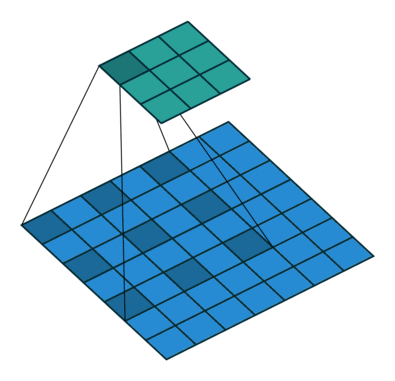

# 2. 池化层处理数据

In [1]:
import torch
from torch import nn 
from torch.nn import MaxPool2d

input = torch.tensor([[1,2,0,3,1],
                     [0,1,2,3,1],
                     [1,2,1,0,0],
                     [5,2,3,1,1],
                     [2,1,0,1,1]], dtype = torch.float32)
input = torch.reshape(input,(-1,1,5,5)) 
print(input.shape)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool = MaxPool2d(kernel_size=3, ceil_mode=True)
        
    def forward(self, input):
        output = self.maxpool(input)
        return output
        
tudui = Tudui()
output = tudui(input)
print(output)

torch.Size([1, 1, 5, 5])
tensor([[[[2., 3.],
          [5., 1.]]]])


# 3. 池化层处理图片

In [2]:
import torch
import torchvision
from torch import nn 
from torch.nn import MaxPool2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool = MaxPool2d(kernel_size=3, ceil_mode=True)
        
    def forward(self, input):
        output = self.maxpool(input)
        return output

tudui = Tudui()
writer = SummaryWriter("logs")
step = 0

for data in dataloader:
    imgs, targets = data
    writer.add_images("input", imgs, step)
    output = tudui(imgs)
    writer.add_images("output", output, step)
    step = step + 1

Files already downloaded and verified


① 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

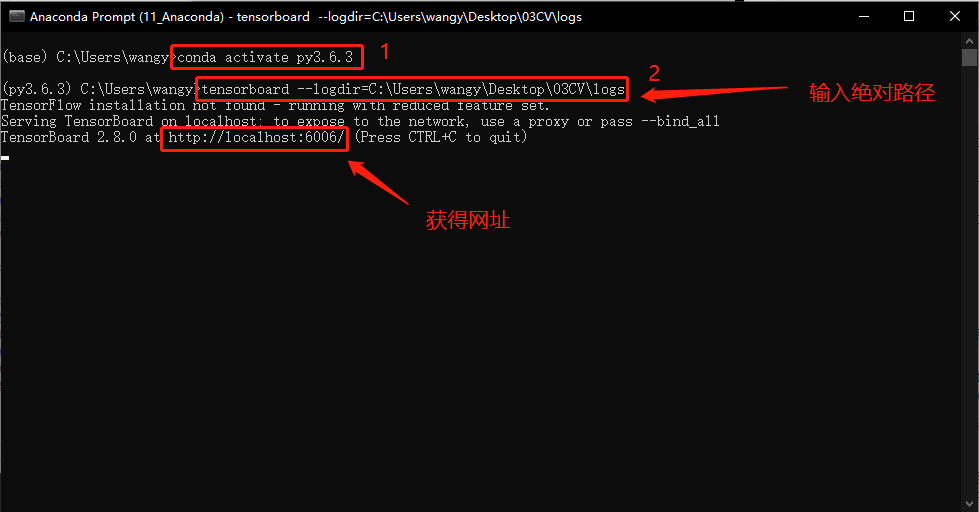

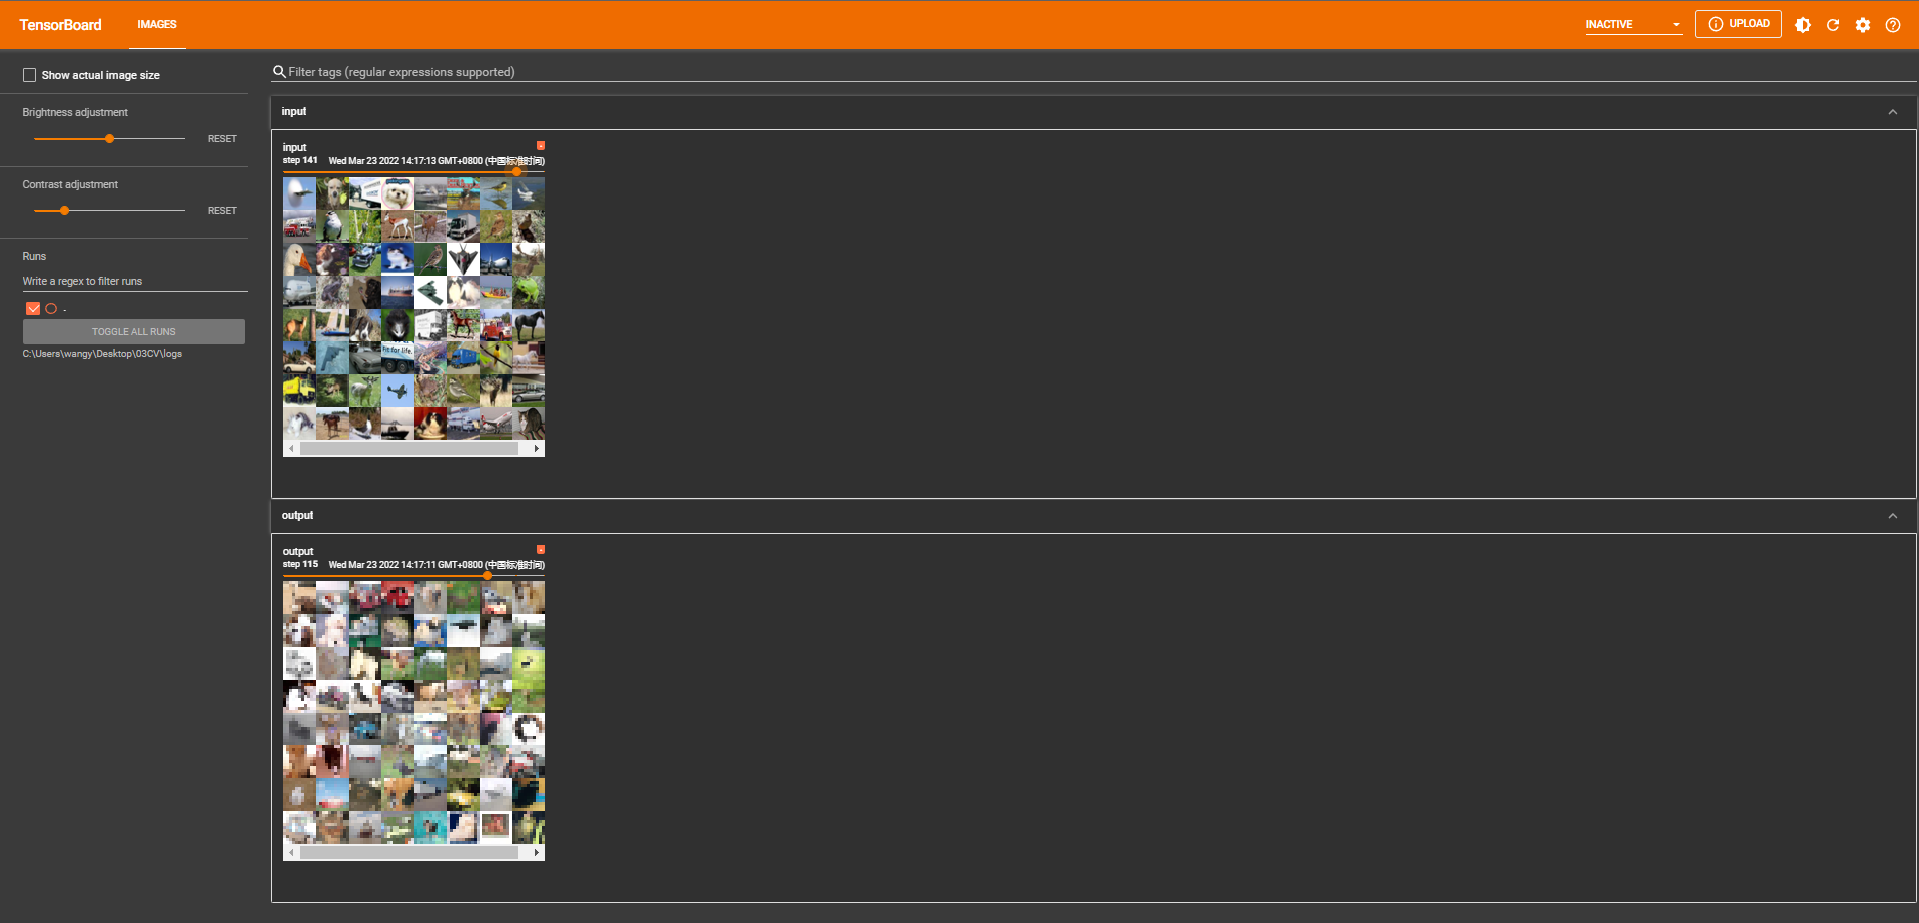